In [1]:
#Importando as bibliotecas
import pandas as pd
import urllib.request
import urllib.parse
import requests

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Declarando as variáveis Globais
url = 'http://servicodados.ibge.gov.br/api/v1/censos/nomes/basica'
df = pd.read_csv('caminho_base_de_dados')

In [ ]:
df.info()

In [5]:
def get_gender(nome):
    name = nome
    args_f = {'nome':name, 'sexo':'f'}
    r_f = requests.get(url, args_f )

    args_m = {'nome':name, 'sexo':'m'}
    r_m = requests.get(url, args_m )

    if(r_m.text == '[]' and r_f.text =='[]'):
        sexo = 'indefinido'
    else:
        if(r_m.text != '[]' and r_f.text !='[]'):
            f = r_f.json()[0]['rank']
            m = r_m.json()[0]['rank']

            sexo = ''
            if(f< m):
                sexo = 'mulher'
            else:
                sexo = 'homem'
        if(r_m.text != '[]' and r_f.text =='[]'):
            sexo = 'homem'
        if(r_m.text == '[]' and r_f.text !='[]'):
             sexo = 'mulher'
    return sexo

In [ ]:
for i, j in df.iterrows():
    nome = j['nome'].split()[0].lower()
    print(nome)

In [ ]:
for i, j in df.iterrows():
    nome = j['nome'].split()[0].lower()
    get_gender(nome)
    print(nome)
#    print(sexo)
df['genero'] = df['nome'].apply(get_gender)

In [ ]:
for i, j in df.iterrows():
    nome = j['nome'].split()[0].lower()
    sexo = get_gender(nome)
    print(nome)
    print(sexo)
    df.loc[i, 'genero'] = sexo
    df['genero'] = df['nome'].apply(get_gender)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Calcular a contagem de cada gênero
contagem_genero = df['genero'].value_counts()

# Calcular as porcentagens
porcentagens = contagem_genero / contagem_genero.sum() * 100

# Imprimir as porcentagens de cada gênero
print(porcentagens)

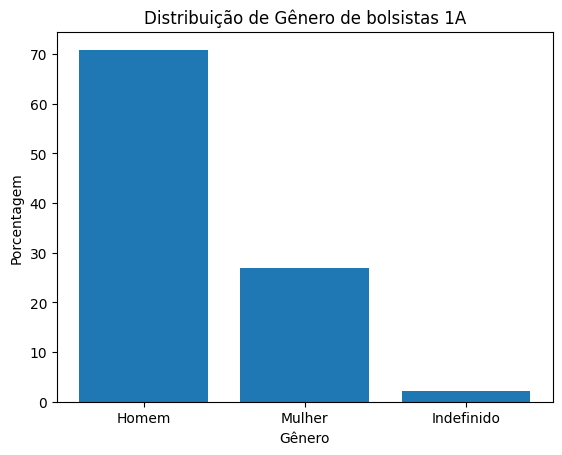

In [ ]:
import matplotlib.pyplot as plt

# Dados da distribuição de gênero
genero = ['Homem', 'Mulher', 'Indefinido']
count = [70.877531, 26.904532, 2.217936]

# Plotagem do gráfico de barras
plt.bar(genero, count)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')
plt.title('Distribuição de Gênero de bolsistas 1A')

# Exibindo o gráfico
plt.show()

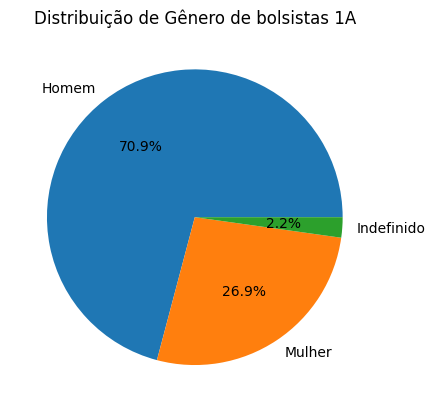

In [ ]:
import matplotlib.pyplot as plt

# Dados da distribuição de gênero
genero = ['Homem', 'Mulher', 'Indefinido']
count = [70.877531, 26.904532, 2.217936]

# Plotagem do gráfico de pizza
plt.pie(count, labels=genero, autopct='%1.1f%%')

# Adicionando título ao gráfico
plt.title('Distribuição de Gênero de bolsistas 1A')

# Exibindo o gráfico
plt.show()

In [ ]:
df2 = pd.read_csv('C:\\Users\\Matheus\\Downloads\\\\1B_novo.csv')
for i, j in df2.iterrows():
    nome = j['nome'].split()[0].lower()
    print(nome)

In [ ]:
df2.head()

In [ ]:
for i, j in df2.iterrows():
    nome = j['nome'].split()[0].lower()
    sexo = get_gender(nome)
    print(nome)
    print(sexo)
    df.loc[i, 'genero'] = sexo
    df['genero'] = df['nome'].apply(get_gender)

In [ ]:
genero = ['Homem', 'Mulher', 'Indefinido']
count = [70.877531, 26.904532, 2.217936]

# Plotagem do gráfico de barras
plt.bar(genero, count)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')
plt.title('Distribuição de Gênero de bolsistas 1A')

# Exibindo o gráfico
plt.show()